In [1]:
from data_analysis_codes import param
from data_analysis_codes.tools import PlottingTools as RPlot
from data_analysis_codes.tools import LinData

def collect(p, zevars):
    pd = RPlot.getdata(p, zevars)
    e = RPlot.geterror(p, 'h5', zevars)
    Lin = LinData.LinData_Class(p, '/home/robynm/simulations/'+p.sim_name+'/')
    return {'p':p, 'pd':pd, 'e':e, 'lin':Lin}

In [2]:
zevars = ['rho_av', 'a_av', 'gdet_av']
Ps = collect(param.pflrw_d1e7_L1821_t1_N64(), zevars)

 read time file


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

Text(0.5, 1.0, 'pflrw_d1e7_L1821_t1_N64')

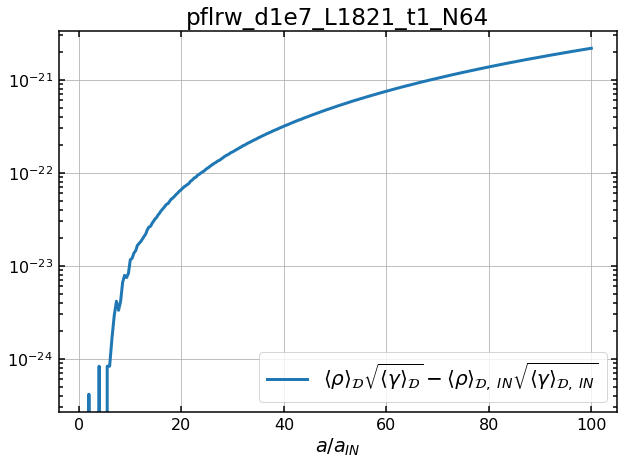

In [32]:
x = 'a_av'
a = Ps['lin'].a('h5')
plt.figure(figsize=(10,7))
#plt.semilogy(a/a[0], Ps['pd']['rho_av'], label=r'$\langle\rho\rangle_{\mathcal{D}}$')
#plt.semilogy(a/a[0], 1/np.sqrt(Ps['pd']['gdet_av']), label=r'$1/\sqrt{\langle\gamma\rangle_{\mathcal{D}}}$')
A = Ps['pd']['rho_av'][0]*np.sqrt(Ps['pd']['gdet_av'][0])
Alab = r'$\frac{\langle\rho\rangle_{\mathcal{D},\;IN} \sqrt{\langle\gamma\rangle_{\mathcal{D},\;IN}}}{\sqrt{\langle\gamma\rangle_{\mathcal{D}}}}$'
#plt.semilogy(a/a[0], A/np.sqrt(Ps['pd']['gdet_av']), color='c', label=Alab, linestyle=':')

plt.semilogy(a/a[0], Ps['pd']['rho_av']*np.sqrt(Ps['pd']['gdet_av'])-Ps['pd']['rho_av'][0]*np.sqrt(Ps['pd']['gdet_av'][0]), label=r'$\langle\rho\rangle_{\mathcal{D}}\sqrt{\langle\gamma\rangle_{\mathcal{D}}}-\langle\rho\rangle_{\mathcal{D},\;IN}\sqrt{\langle\gamma\rangle_{\mathcal{D},\;IN}}$')
plt.legend(fontsize=20)
plt.grid()
plt.xlabel(r'$a/a_{IN}$')
plt.title(Ps['p'].sim_name)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

In [33]:
Ps['pd']['rho_av'][0]*np.sqrt(Ps['pd']['gdet_av'][0])

1.897042009753771e-09